In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import metrics

<IPython.core.display.Javascript object>

In [3]:
file_path = "https://github.com/jhl126/bostonmarathon/blob/master/results/2014/results.csv?raw=true"

<IPython.core.display.Javascript object>

In [4]:
yr_2014 = pd.read_csv(file_path, error_bad_lines=False)

<IPython.core.display.Javascript object>

In [5]:
yr_2014.shape

(31984, 21)

<IPython.core.display.Javascript object>

In [6]:
yr_2014.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


<IPython.core.display.Javascript object>

In [7]:
# around 96% of data is missing for ctz, so drop this column
# additionally, state, city, and country seem to be unimportant, so drop state, city, and country column
# less than 1% of data is missing in city column, so drop na's
yr_2014.isna().mean()

10k          0.000000
name         0.000000
division     0.000000
25k          0.000000
gender       0.000000
age          0.000000
official     0.000000
bib          0.000000
genderdiv    0.000000
ctz          0.961106
35k          0.000000
overall      0.000000
pace         0.000000
state        0.080540
30k          0.000000
5k           0.000000
half         0.000000
20k          0.000000
country      0.000000
city         0.000031
40k          0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [8]:
yr_2014 = yr_2014.drop(columns=["ctz", "state", "city", "name", "bib", "country"])

<IPython.core.display.Javascript object>

In [9]:
yr_2014 = yr_2014.dropna()

<IPython.core.display.Javascript object>

In [10]:
yr_2014.dtypes

10k           object
division       int64
25k           object
gender        object
age            int64
official     float64
genderdiv      int64
35k           object
overall        int64
pace         float64
30k           object
5k            object
half          object
20k           object
40k           object
dtype: object

<IPython.core.display.Javascript object>

In [11]:
# converting objects into floats and getting rid of na values
yr_2014["5k"] = yr_2014["5k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["5k"] = yr_2014["5k"].astype(float)

yr_2014["10k"] = yr_2014["10k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["10k"] = yr_2014["10k"].astype(float)

yr_2014["20k"] = yr_2014["20k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["20k"] = yr_2014["20k"].astype(float)

yr_2014["25k"] = yr_2014["25k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["25k"] = yr_2014["25k"].astype(float)

yr_2014["30k"] = yr_2014["30k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["30k"] = yr_2014["30k"].astype(float)

yr_2014["35k"] = yr_2014["35k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["35k"] = yr_2014["35k"].astype(float)

yr_2014["40k"] = yr_2014["40k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["40k"] = yr_2014["40k"].astype(float)

yr_2014["half"] = yr_2014["half"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["half"] = yr_2014["half"].astype(float)

<IPython.core.display.Javascript object>

In [12]:
# onehot encoding the categorical columns so the data frame can go through pca
cat_cols = ["gender"]
yr_2014 = pd.get_dummies(yr_2014, columns=cat_cols, drop_first=True)
yr_2014.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_M
0,17.37,8,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,1
1,32.58,1,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,0
2,16.62,1,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,1
3,32.57,3,82.43,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,0
4,17.12,2,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,1


<IPython.core.display.Javascript object>

In [13]:
yr_2014.drop(yr_2014.tail(1).index, inplace=True)  # drop last row to make data even
yr_2014.shape

(31648, 15)

<IPython.core.display.Javascript object>

## Using KMeans with PCA

In [14]:
scaler = StandardScaler()
X_std = scaler.fit_transform(yr_2014)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std, X_pca, test_size=0.5, random_state=13
)

<IPython.core.display.Javascript object>

In [15]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([(X_half1, X_pcahalf1), (X_half2, X_pcahalf2)]):

    # Put the features into ypred.
    ypred["pca_f1" + "_sample" + str(counter)] = data[1][:, 0]
    ypred["pca_f2" + "_sample" + str(counter)] = data[1][:, 1]
    for nclust in range(4, 11):
        pred = KMeans(n_clusters=nclust, random_state=13).fit_predict(data[counter])
        ypred["clust" + str(nclust) + "_sample" + str(counter)] = pred

<IPython.core.display.Javascript object>

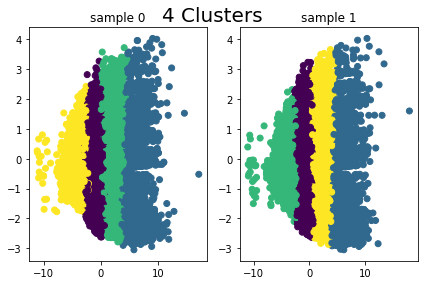



4 clusters: 
0.3538449315831202


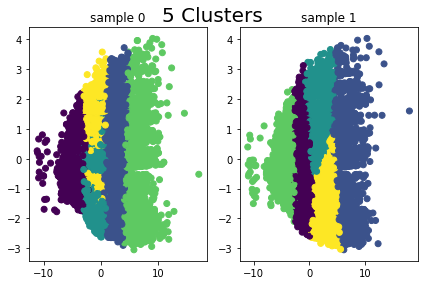



5 clusters: 
0.357735881184452


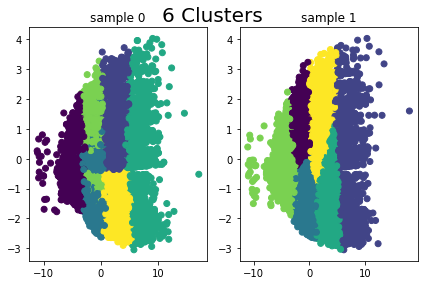



6 clusters: 
0.3646549006447799


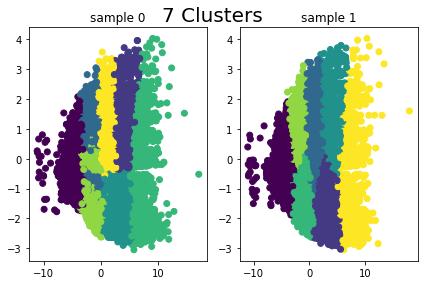



7 clusters: 
0.37376332631251136


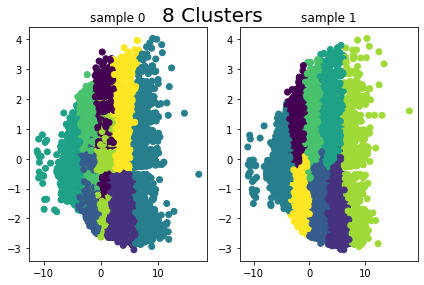



8 clusters: 
0.36955495725095583


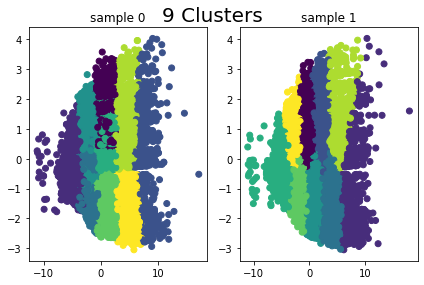



9 clusters: 
0.3635714262691512


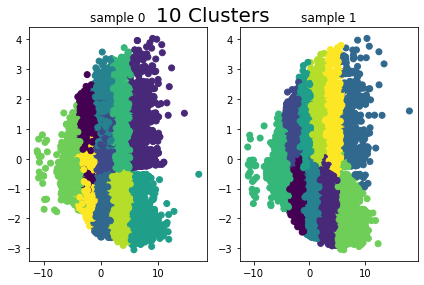



10 clusters: 
0.35916105917984437


<IPython.core.display.Javascript object>

In [16]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(4, 11):

    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)

    # Make a plot for each sample.
    for i in range(2):

        # PCA-created features.
        x_sub = ypred["pca_f1_sample{}".format(i)]
        y_sub = ypred["pca_f2_sample{}".format(i)]

        # Cluster assignments.
        c = ypred["clust{}_sample{}".format(cluster, i)]

        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title("sample {}".format(i))

    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle("{} Clusters".format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print("\n")

    labels = KMeans(n_clusters=cluster).fit_predict(X_pca)
    print(str(cluster) + " clusters: ")
    print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

In [17]:
# for k in range(4, 11):
#     km = KMeans(n_clusters=k)
#     km.fit(X_std)
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X_std)

#     f, axarr = plt.subplots(1, 2)

#     # Make a plot for each sample.
#     for i in range(2):

#         # PCA-created features.
#         x_sub = ypred["pca_f1_sample{}".format(i)]
#         y_sub = ypred["pca_f2_sample{}".format(i)]

#         # Cluster assignments.
#         c = ypred["clust{}_sample{}".format(k, i)]

#         # Assign the subplot to its place on the grid.
#         axarr[i].scatter(x_sub, y_sub, c=c)
#         axarr[i].set_title("sample {}".format(i))

#     # silhouette scores for each cluster
#     labels = KMeans(n_clusters=k).fit_predict(X_pca)
#     print(str(k) + " clusters: ")
#     print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

<IPython.core.display.Javascript object>

## Using DBSCAN with t-SNE

In [18]:
scaler = StandardScaler()
scaled = scaler.fit_transform(yr_2014)

<IPython.core.display.Javascript object>

In [19]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 31648 samples in 0.117s...
[t-SNE] Computed neighbors for 31648 samples in 3.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 31648
[t-SNE] Computed conditional probabilities for sample 2000 / 31648
[t-SNE] Computed conditional probabilities for sample 3000 / 31648
[t-SNE] Computed conditional probabilities for sample 4000 / 31648
[t-SNE] Computed conditional probabilities for sample 5000 / 31648
[t-SNE] Computed conditional probabilities for sample 6000 / 31648
[t-SNE] Computed conditional probabilities for sample 7000 / 31648
[t-SNE] Computed conditional probabilities for sample 8000 / 31648
[t-SNE] Computed conditional probabilities for sample 9000 / 31648
[t-SNE] Computed conditional probabilities for sample 10000 / 31648
[t-SNE] Computed conditional probabilities for sample 11000 / 31648
[t-SNE] Computed conditional probabilities for sample 12000 / 31648
[t-SNE] Computed conditional probabilities for sa

<IPython.core.display.Javascript object>

In [20]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)
for i in range(1, 26):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print(
        "Number of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )

Number of clusters when min_samples=1 is: 1
Number of clusters when min_samples=2 is: 1
Number of clusters when min_samples=3 is: 1
Number of clusters when min_samples=4 is: 1
Number of clusters when min_samples=5 is: 1
Number of clusters when min_samples=6 is: 1
Number of clusters when min_samples=7 is: 1
Number of clusters when min_samples=8 is: 1
Number of clusters when min_samples=9 is: 1
Number of clusters when min_samples=10 is: 1
Number of clusters when min_samples=11 is: 1
Number of clusters when min_samples=12 is: 1
Number of clusters when min_samples=13 is: 1
Number of clusters when min_samples=14 is: 1
Number of clusters when min_samples=15 is: 1
Number of clusters when min_samples=16 is: 1
Number of clusters when min_samples=17 is: 1
Number of clusters when min_samples=18 is: 1
Number of clusters when min_samples=19 is: 1
Number of clusters when min_samples=20 is: 1
Number of clusters when min_samples=21 is: 1
Number of clusters when min_samples=22 is: 1
Number of clusters 

<IPython.core.display.Javascript object>

In [22]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)

for i in [
    0.03,
    0.04,
    0.05,
    0.06,
    0.07,
    0.08,
]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=25, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))
    labels = DBSCAN(eps=i, min_samples=1, metric="euclidean").fit_predict(tsne_results)
    print(str(len(np.unique(clusters))) + " cluster score: ")
    print(metrics.silhouette_score(tsne_results, labels, metric="euclidean"))

Number of clusters when eps=0.03 is: 2
2 cluster score: 
0.23071453
Number of clusters when eps=0.04 is: 5
5 cluster score: 
0.25273174
Number of clusters when eps=0.05 is: 4
4 cluster score: 
0.22178712
Number of clusters when eps=0.06 is: 8
8 cluster score: 
0.13782448
Number of clusters when eps=0.07 is: 10
10 cluster score: 
0.03318075
Number of clusters when eps=0.08 is: 15
15 cluster score: 
-0.10341425


<IPython.core.display.Javascript object>